In [1]:
# Download the Iris flower dataset or any other dataset into a DataFrame. (e.g., https://archive.ics.uci.edu/ml/datasets/Iris). Scan the dataset and give the inference as:

# 1.List down the features and their types (e.g., numeric, nominal) available in the dataset.

# 2.Create a histogram for each feature in the dataset to illustrate the feature distributions.

# 3.Create a box plot for each feature in the dataset.

# 4.Compare distributions and identify outliers.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


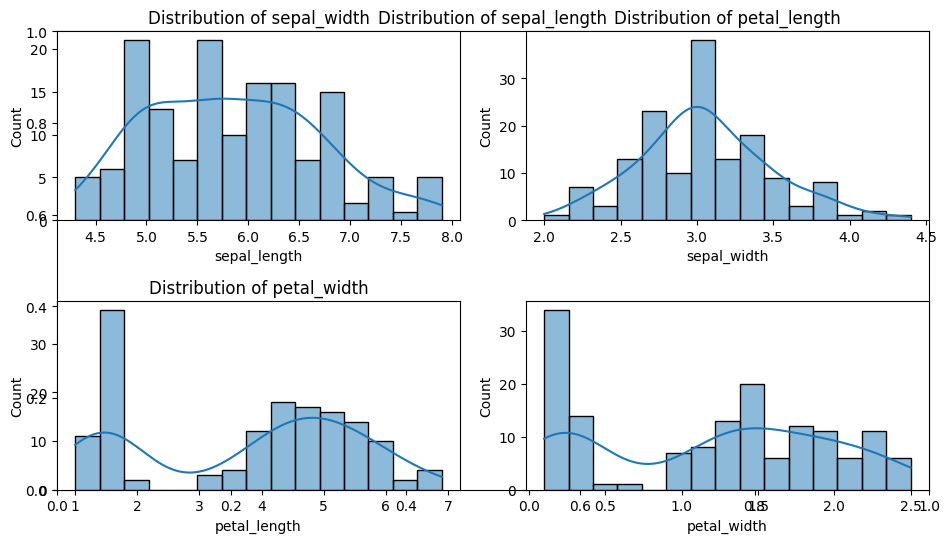

In [5]:
plt.figure(figsize=(10,6))
for i, column in enumerate(df.columns[:-1]):
    plt.title(f"Distribution of {column}")
    plt.subplot(2,2,i+1)
    sns.histplot(data=df[column], bins=15, kde=True)
plt.tight_layout()
plt.show()

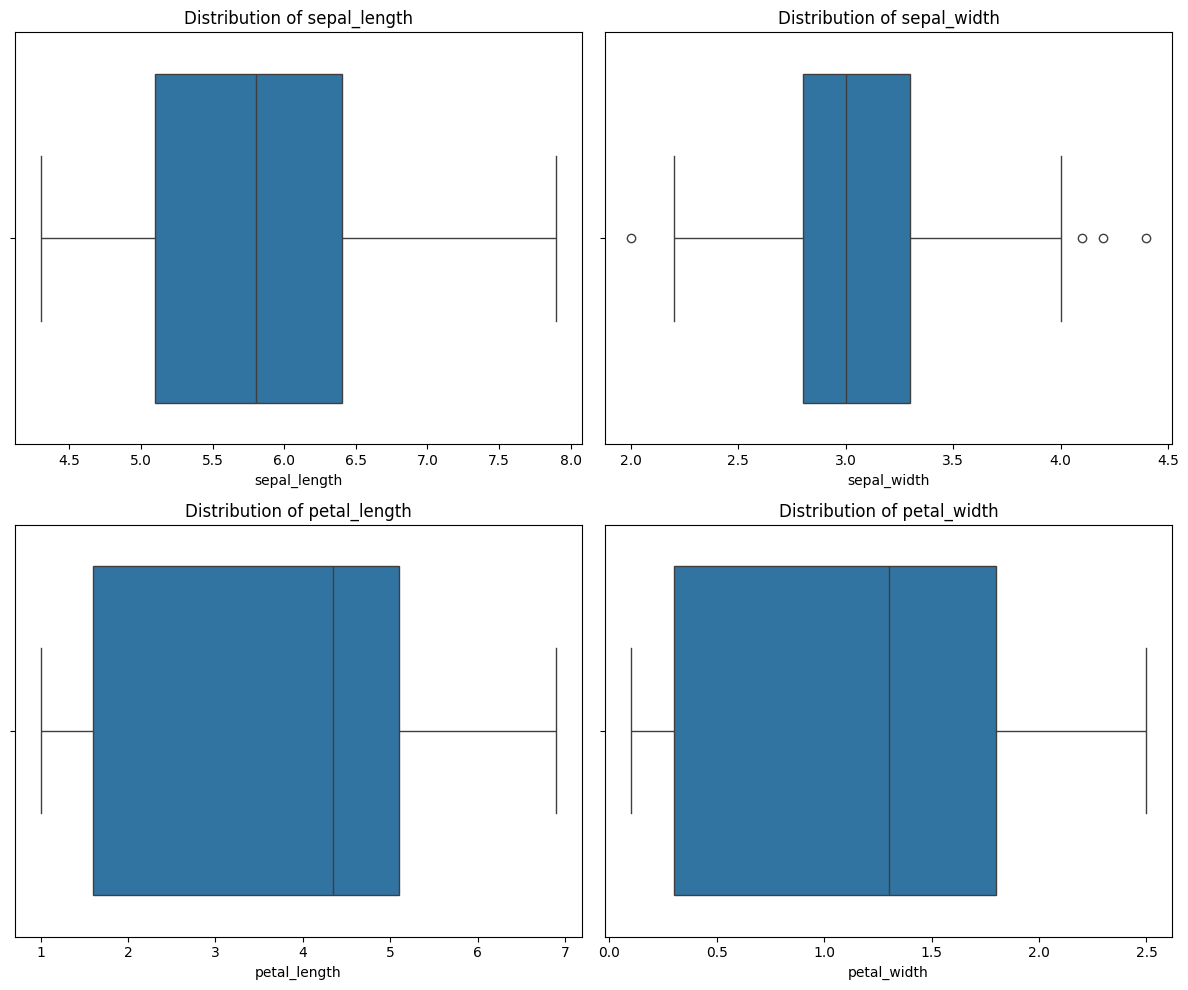

In [9]:
plt.figure(figsize=(12,10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[column])
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

<Axes: >

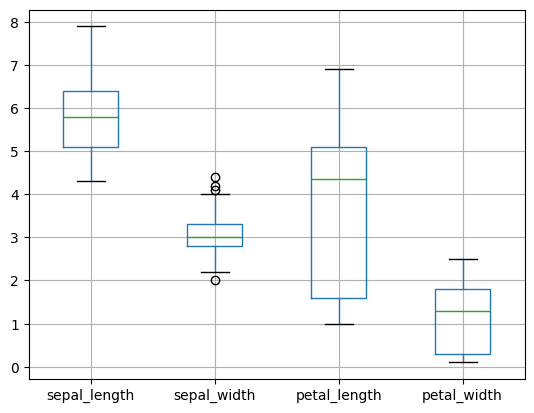

In [12]:
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cat_cols = ['species']
df.boxplot(num_cols)


In [14]:
import numpy as np
for x in ['sepal_width']:
    q1, q3 = np.percentile(df.loc[:,x],[25,75])
    iqr = q3 - q1
    high, low = q3 + iqr * 1.5, q1 - iqr * 1.5

    df.loc[df[x] < low,x] = np.nan
    df.loc[df[x] > high,x] = np.nan
    

In [15]:
df.isnull().sum()

sepal_length    0
sepal_width     4
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
df= df.fillna(df.median(numeric_only= True))

In [18]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64